In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
%matplotlib inline

In [2]:
# defining functions

def same_sign(a, b):
    '''
    This function is used in the bisection function below 
    in order to determine the presence of a root within the 
    interval [a,b]
    
    Params:
    -------
    a, b = interval of function
    
    Output:
    -------
    True or False, depending on if they are the same sign
    '''
    
    return a * b > 0

def bisect(func, low, high, niter):
    '''
    Params:
    -------
    func = the function to find the root of
    low = lower bound of the interval containing the root
    high = upper bound of the interval containing the root
    niter = number of iterations desired
    
    Output:
    -------
    mid = the midpoint after niter iterations
    '''
    
    global x_b,y_b,n_b # np.arrays of numbers calculated below to graph progress of successive iterations
    assert not same_sign(func(low), func(high))
    for i in range(niter):
        mid = (low + high)/2
        x_b = np.append(x_b,mid)
        y_b = np.append(y_b,func(mid))
        if same_sign(func(low), func(mid)):
            low = mid
        else:
            high = mid
    return mid            


def newt(func, dfunc, guess, niters):
    '''
    Params:
    -------
    func = the function to find the root of
    dfunc = the analytic derivative of the above function
    guess = just a guess of where the root is
    niters = number of iterations desired
    
    Output:
    -------
    x_new = location of the root after niter iterations
    
    '''
    global x_n, y_n
    for n in range(niters):
        #pdb.set_trace()
        x_new = guess - func(guess)/dfunc(guess)
        y_new = func(x_new)
        x_n = np.append(x_n, x_new)
        y_n = np.append(y_n, y_new)
        guess = x_new
    return x_new
        
    
# modeling x^2 = a = 2
def test_func(x):
    y = x ** 2 - 2
    return y

def dtest_func(x):
    y = 2 * x
    return y

# modeling keplers equations
def Kepler(E):
    '''
    Params:
    ------
    E = eccentric anomoly
    
    Global Params:
    --------------
    M = mean anomoly
    e = eccentricity
    
    Output:
    ------
    the function solved for the specifed M and e, given E
    '''
    
    global M, e
    y = M - E + e*np.sin(E)
    return y

def dKepler(E):
    '''
    same as above, just the first derivative w.r.t. E
    '''
    global M, e
    dy = -1 + e * np.cos(E)
    return dy


# of Iterations: 5
a)Bisection: 1.40625
a)Newton-Raphson: 1.4142135623730951
b)Bisection Kepler e=0.5: 1.7671458676442586
b)Newton-Raphson Kepler e=0.5 1.96218928758
b)Bisection Kepler e=0.9: 2.1598449493429825
b)Newton-Raphson Kepler e=0.9: 2.2179972026


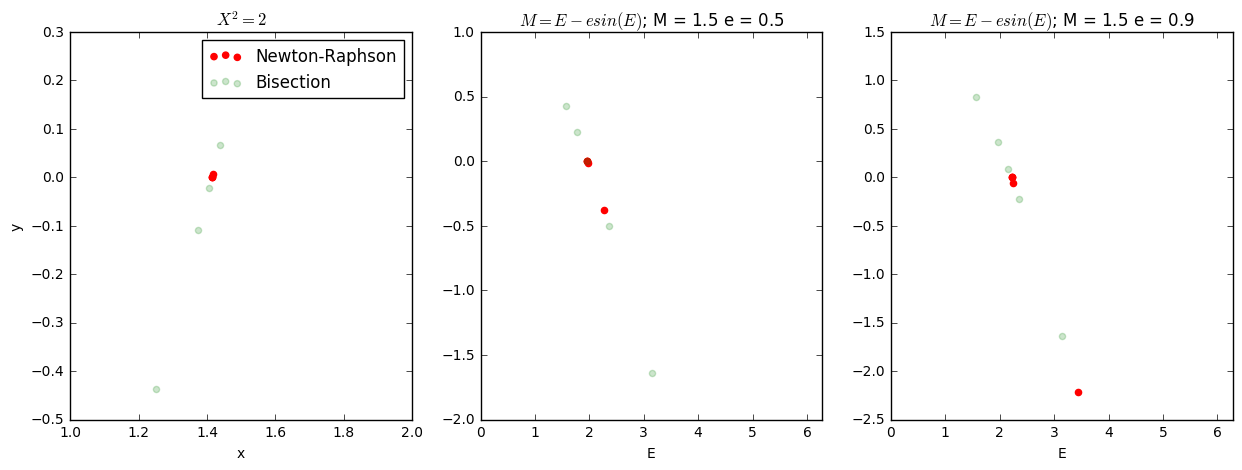

In [3]:
# applying the above functions

# bounds for the bisection method
lower = 1
upper = 2

# number of iterations for both methods
niter = 5

# arrays containing (x_0, f(x_0), x_1, f(x_1), etc)
# bisection
x_b = np.array([])
y_b = np.array([])
n_b = np.array([])


# the actual approximation after niter iterations
# bisection
b = bisect(test_func, lower, upper, niter)


# arrays containing (x_0, f(x_0), x_1, f(x_1), etc)
# Newton-Raphson
# guess = initial guess (duh...)
guess = 1        
x_n = np.array([])
y_n = np.array([])
n_n = np.array([])

# the actual approximation after niter iterations
n = newt(test_func, dtest_func, guess, niter)

print ('# of Iterations: '+str(niter))
print ('a)Bisection: '+str(b))
print ('a)Newton-Raphson: '+str(n))

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

ax[0].scatter(x_n,y_n, color='red', label = 'Newton-Raphson')
ax[0].scatter(x_b,y_b, color='green', label='Bisection', alpha = 0.2)
ax[0].set(xlim=(1,2), xlabel='x', ylabel='y', title='$X^2 = 2$')
ax[0].legend(loc=0)


# clears the above arrays once plotted
# to allow for plotting of the Kepler equation
x_n = np.array([])
y_n = np.array([])
x_b = np.array([])
y_b = np.array([])

M = 1.5
e = 0.5
k_bisection = bisect(Kepler, 0, 2*np.pi, niter)
k_newt = newt(Kepler, dKepler, guess, niter)


ax[1].set(title='$M = E - esin(E)$; M = 1.5 e = 0.5', xlabel='E', xlim=(0,2*np.pi))
ax[1].scatter(x_n, y_n, color = 'red', label='Newton-Raphson')
ax[1].scatter(x_b, y_b, color = 'green', label = 'Bisection', alpha = 0.2)
print ('b)Bisection Kepler e=0.5: '+ str(k_bisection))
print ('b)Newton-Raphson Kepler e=0.5 '+str(k_newt))

# clears the above arrays once plotted
# to allow for plotting of the Kepler equation
x_n = np.array([])
y_n = np.array([])
x_b = np.array([])
y_b = np.array([])

M = 1.5
e = 0.9
k_bisection = bisect(Kepler, 0, 2*np.pi, niter)
k_newt = newt(Kepler, dKepler, guess, niter)
print ('b)Bisection Kepler e=0.9: '+str(k_bisection))
print ('b)Newton-Raphson Kepler e=0.9: '+ str(k_newt))

ax[2].set(title='$M = E - esin(E)$; M = 1.5 e = 0.9', xlabel='E', xlim=(0,2*np.pi))
ax[2].scatter(x_n, y_n, color = 'red', label='Newton-Raphson')
ax[2].scatter(x_b, y_b, color = 'green', label = 'Bisection', alpha = 0.2)





The above figures are generated using a scatter plot instead of a line plot, because overlaying both methods for root finding would look messy and not convey they accuracy achieved for each method after 5 iterations. 

niters = 5 was chosen such that there would be a large enough discrepancy between the Bisection and Newton-Raphson methods. For large "niters", they both converge to a number within machine precision.

In [4]:
# we want to get maximum precision in the fewest number of iterations, so lets rewrite the solvers above:

def bisect_prec(func, low, high):
    '''
    Params:
    -------
    func = the function to find the root of
    low = lower bound of the interval containing the root
    high = upper bound of the interval containing the root
    
    Output:
    -------
    mid = the midpoint after niter iterations
    '''
    
    global x_b,y_b,n_b # np.arrays of numbers calculated below to graph progress of successive iterations
    assert not same_sign(func(low), func(high))
    n = 1
    while True:
        n_b = np.append(n_b, n)
        mid = (low + high)/2
        x_b = np.append(x_b,mid)
        y_b = np.append(y_b,func(mid))
        if same_sign(func(low), func(mid)):
            low = mid
        else:
            high = mid
        if x_b.size >=2 and np.abs(x_b[-1] - x_b[-2])<= 1e-15: # difference is less than machine resolution
            n_b = n_b[:-1]
            x_b = x_b[:-1]
            y_b = y_b[:-1] 
            break
        n+=1
    return mid            


def newt_prec(func, dfunc, guess):
    '''
    Params:
    -------
    func = the function to find the root of
    dfunc = the analytic derivative of the above function
    guess = just a guess of where the root is
    
    Output:
    -------
    x_new = location of the root after niter iterations
    
    '''
    global x_n, y_n, n_n
    n = 1
    #pdb.set_trace()
    while True:
        n_n = np.append(n_n, n)
        x_new = guess - func(guess)/dfunc(guess)
        y_new = func(x_new)
        x_n = np.append(x_n, x_new)
        y_n = np.append(y_n, y_new)
        guess = x_new
        # diff between last two iterations less than machine precision --> accurate enough
        if x_n.size >=2 and np.abs(x_n[-1] - x_n[-2])<= 1e-15: 
            n_n = n_n[:-1]
            x_n = x_n
            y_n = y_n[:-1]
            break
        n+=1
    return x_n[-1]
        

In [5]:
x_n = np.array([])
y_n = np.array([])
x_b = np.array([])
y_b = np.array([])

M = 1.5
e = 0.9
k_bisection = bisect_prec(Kepler, 0, 2*np.pi)
k_newt = newt_prec(Kepler, dKepler, guess)

print ('n = # of iterations\n')
print ('K_newt \t\t     n \t  K_bisect \t      n')
k_newt, n_n[-1], k_bisection, n_b[-1]

n = # of iterations

K_newt 		     n 	  K_bisect 	      n


(2.2179972025985775, 5.0, 2.2179972025985775, 52.0)

Since the Newton-Raphson method reaches machine precision (1e-15) in 5 iterations and the Bisection method reaches machine precision in 52 iterations, it is apparent that the Newton-Raphson method achieves the same accuracy in many fewer iterations, and is preferred when wanting to solve as quickly as possible. 

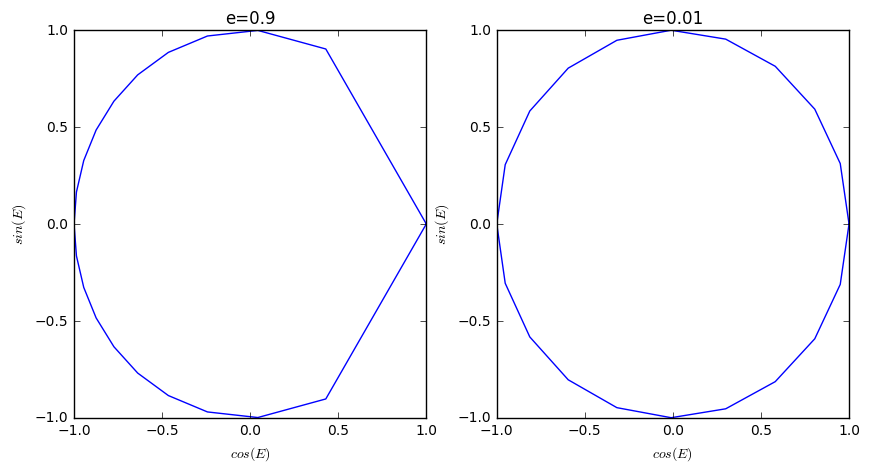

In [6]:
# now to plot for 20 equally spaced M from 0 to 2pi
x_n = np.array([])
y_n = np.array([])
x_b = np.array([])
y_b = np.array([])

E_n = np.array([])
niters = 100
guess = 1
M = 0
e = 0.9

# we'll use Newton so that this doesn't take forever
while M <= 2 * np.pi:
    E = newt(Kepler, dKepler, guess, niters) # using set number of iters b/c inf loop for M = 4pi/20
    E_n = np.append(E_n, E)
    M += (2 * np.pi / 20)
    
fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
x = np.cos(E_n)
y = np.sin(E_n)

ax[0].plot(x,y)
ax[0].set(xlabel='$cos(E)$', ylabel='$sin(E)$', title='e=0.9')

# do the same for e = 0.01 to compare to e = 0.9
x_n = np.array([])
y_n = np.array([])
x_b = np.array([])
y_b = np.array([])

E_n = np.array([])
niters = 100
guess = 1
M = 0
e = 0.01

# we'll use Newton so that this doesn't take forever
while M <= 2 * np.pi:
    E = newt(Kepler, dKepler, guess, niters) # using set number of iters b/c inf loop for M = 4pi/20
    E_n = np.append(E_n, E)
    M += (2 * np.pi / 20)

x = np.cos(E_n)
y = np.sin(E_n)
    
ax[1].plot(x,y)
ax[1].set(xlabel='$cos(E)$', ylabel='$sin(E)$', title='e=0.01')

For a very eccentric orbit (e=0.9) the body is moving much faster at perihelion than at aphelion, making the change in $sin(E)$ for even steps of Mean anomoly much greater, so we have worse resolution when $cos(E) > 0$. Comparing for a circular orbit (e=0.01), we see a more evenly spaced change in $sin(E)$ and therefore, greater resolution and a smoother curve.